In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from stock import GBM_stock
from tqdm import trange
from utils import episodes_50_gbm
import random
import matplotlib.pyplot as plt
from ddpg import ddpgAgent

In [2]:
eposide = 15000
random.seed(24)

ddpg_agent = ddpgAgent(alpha=0.0003, beta=0.0003, input_dim=[2], tau=0.001)

best_test_50 = -100

test_scores_ddpg = []
for i in trange(eposide):

    env = GBM_stock(S0=50, rf=0.05, sigma=0.3, n_step=20)
    done = False
    score = 0
    state = env.reset()
    while not done:
        action = ddpg_agent.choose_action(state)
        next_state, reward, done = env.step(action)
        ddpg_agent.remember(state, action, reward, next_state, int(done))
        ddpg_agent.learn()
        score += reward
        state = next_state

    # score_history.append(score)
    if (i+1) % 100 == 0:
        test_50 = episodes_50_gbm(ddpg_agent, S=50, r=0.05, sigma=0.3, n_step=20)
        print('episode ', i, 'score %.2f' % score,
              '50 test average score %.2f' % test_50)

        if test_50 > best_test_50:
            best_test_50 = test_50
            ddpg_agent.save_models()

        test_scores_ddpg.append(test_50)
        if abs(test_50) < 0.1:
            print('Finish training early')
            break

  0%|                                                 | 0/15000 [00:00<?, ?it/s]/Users/zhuzheng/Desktop/rl_assignment2/ddpg.py:204: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1678402629672/work/torch/csrc/utils/tensor_new.cpp:248.)
  action = torch.tensor(action, dtype=torch.float).to(self.critic.device)
  1%|▏                                    | 100/15000 [00:16<1:03:13,  3.93it/s]

episode  99 score -3.02 50 test average score -3.65
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  1%|▌                                      | 201/15000 [00:35<57:31,  4.29it/s]

episode  199 score -2.05 50 test average score -3.83


  2%|▊                                      | 301/15000 [00:52<56:12,  4.36it/s]

episode  299 score -6.22 50 test average score -4.04


  3%|█                                      | 401/15000 [01:09<56:44,  4.29it/s]

episode  399 score -1.57 50 test average score -4.06


  3%|█▎                                     | 501/15000 [01:26<55:07,  4.38it/s]

episode  499 score -8.10 50 test average score -4.03


  4%|█▌                                     | 601/15000 [01:42<56:11,  4.27it/s]

episode  599 score -4.69 50 test average score -4.39


  5%|█▊                                     | 701/15000 [01:59<53:37,  4.44it/s]

episode  699 score -3.59 50 test average score -3.76


  5%|█▉                                   | 800/15000 [02:16<1:02:16,  3.80it/s]

episode  799 score -4.61 50 test average score -3.52
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  6%|██▎                                    | 901/15000 [02:33<56:52,  4.13it/s]

episode  899 score -4.12 50 test average score -3.66


  7%|██▌                                   | 1001/15000 [02:50<55:10,  4.23it/s]

episode  999 score -8.10 50 test average score -3.58


  7%|██▊                                   | 1101/15000 [03:07<56:35,  4.09it/s]

episode  1099 score -3.70 50 test average score -3.99


  8%|██▉                                 | 1200/15000 [03:24<1:00:18,  3.81it/s]

episode  1199 score -1.52 50 test average score -1.91
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  9%|███                                 | 1300/15000 [03:41<1:01:50,  3.69it/s]

episode  1299 score -0.95 50 test average score -1.52
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  9%|███▎                                | 1400/15000 [03:58<1:01:39,  3.68it/s]

episode  1399 score -2.11 50 test average score -1.34
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 10%|███▊                                  | 1501/15000 [04:16<57:14,  3.93it/s]

episode  1499 score -3.96 50 test average score -1.44


 11%|████                                  | 1601/15000 [04:33<54:16,  4.11it/s]

episode  1599 score -1.41 50 test average score -1.27
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 11%|████▎                                 | 1701/15000 [04:51<54:25,  4.07it/s]

episode  1699 score -1.19 50 test average score -1.41


 12%|████▌                                 | 1801/15000 [05:08<52:41,  4.17it/s]

episode  1799 score -1.72 50 test average score -2.23


 13%|████▊                                 | 1900/15000 [05:25<58:25,  3.74it/s]

episode  1899 score -4.38 50 test average score -1.10
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 13%|█████                                 | 2001/15000 [05:43<51:35,  4.20it/s]

episode  1999 score -1.24 50 test average score -1.86


 14%|█████▎                                | 2100/15000 [06:00<57:06,  3.77it/s]

episode  2099 score -0.85 50 test average score -1.08
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 15%|█████▌                                | 2201/15000 [06:18<52:31,  4.06it/s]

episode  2199 score -5.48 50 test average score -1.15


 15%|█████▊                                | 2300/15000 [06:37<58:49,  3.60it/s]

episode  2299 score -1.15 50 test average score -0.91
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 16%|██████                                | 2401/15000 [06:55<51:43,  4.06it/s]

episode  2399 score -1.25 50 test average score -1.30


 17%|██████▎                               | 2501/15000 [07:14<54:22,  3.83it/s]

episode  2499 score -2.52 50 test average score -1.14


 17%|██████▌                               | 2601/15000 [07:32<51:14,  4.03it/s]

episode  2599 score -2.63 50 test average score -0.95


 18%|██████▊                               | 2701/15000 [07:50<51:35,  3.97it/s]

episode  2699 score -2.21 50 test average score -1.49


 19%|███████                               | 2801/15000 [08:09<50:00,  4.07it/s]

episode  2799 score -2.28 50 test average score -0.97


 19%|███████▎                              | 2900/15000 [08:27<57:31,  3.51it/s]

episode  2899 score -1.24 50 test average score -0.85
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 20%|███████▌                              | 3000/15000 [08:45<58:43,  3.41it/s]

episode  2999 score -1.79 50 test average score -0.84
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 21%|███████▊                              | 3100/15000 [09:03<54:22,  3.65it/s]

episode  3099 score -3.30 50 test average score -0.98


 21%|████████                              | 3201/15000 [09:22<51:15,  3.84it/s]

episode  3199 score -1.12 50 test average score -1.20


 22%|████████▎                             | 3301/15000 [09:40<48:28,  4.02it/s]

episode  3299 score -1.82 50 test average score -0.90


 23%|████████▌                             | 3401/15000 [09:59<48:29,  3.99it/s]

episode  3399 score -2.92 50 test average score -0.92


 23%|████████▊                             | 3501/15000 [10:17<49:03,  3.91it/s]

episode  3499 score -0.75 50 test average score -0.77
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 24%|█████████                             | 3601/15000 [10:35<47:21,  4.01it/s]

episode  3599 score -1.10 50 test average score -1.01


 25%|█████████▍                            | 3701/15000 [10:54<47:45,  3.94it/s]

episode  3699 score -2.39 50 test average score -1.30


 25%|█████████▋                            | 3801/15000 [11:12<47:14,  3.95it/s]

episode  3799 score -2.42 50 test average score -1.27


 26%|█████████▉                            | 3901/15000 [11:31<49:27,  3.74it/s]

episode  3899 score -1.61 50 test average score -0.93


 27%|██████████▏                           | 4001/15000 [11:49<45:57,  3.99it/s]

episode  3999 score -0.97 50 test average score -0.83


 27%|██████████▍                           | 4101/15000 [12:08<45:06,  4.03it/s]

episode  4099 score -1.97 50 test average score -1.29


 28%|██████████▋                           | 4201/15000 [12:26<45:45,  3.93it/s]

episode  4199 score -0.65 50 test average score -0.79


 29%|██████████▉                           | 4301/15000 [12:44<45:12,  3.94it/s]

episode  4299 score -0.67 50 test average score -1.28


 29%|███████████▏                          | 4401/15000 [13:03<45:12,  3.91it/s]

episode  4399 score -4.42 50 test average score -1.09


 30%|███████████▍                          | 4500/15000 [13:21<50:13,  3.48it/s]

episode  4499 score -1.49 50 test average score -0.97


 31%|███████████▋                          | 4601/15000 [13:40<44:09,  3.93it/s]

episode  4599 score -7.25 50 test average score -0.82


 31%|███████████▉                          | 4701/15000 [13:58<43:16,  3.97it/s]

episode  4699 score -1.29 50 test average score -1.70


 32%|████████████▏                         | 4801/15000 [14:17<43:02,  3.95it/s]

episode  4799 score -0.90 50 test average score -1.04


 33%|████████████▍                         | 4901/15000 [14:35<42:29,  3.96it/s]

episode  4899 score -3.05 50 test average score -1.02


 33%|████████████▋                         | 5001/15000 [14:53<42:59,  3.88it/s]

episode  4999 score -1.17 50 test average score -0.81


 34%|████████████▉                         | 5101/15000 [15:12<41:47,  3.95it/s]

episode  5099 score -0.55 50 test average score -1.28


 35%|█████████████▏                        | 5201/15000 [15:30<45:35,  3.58it/s]

episode  5199 score -2.46 50 test average score -0.99


 35%|█████████████▍                        | 5301/15000 [15:49<40:53,  3.95it/s]

episode  5299 score -2.14 50 test average score -1.08


 36%|█████████████▋                        | 5401/15000 [16:07<41:13,  3.88it/s]

episode  5399 score -2.88 50 test average score -0.84


 37%|█████████████▉                        | 5501/15000 [16:26<40:18,  3.93it/s]

episode  5499 score -1.76 50 test average score -0.94


 37%|██████████████▏                       | 5600/15000 [16:44<53:59,  2.90it/s]

episode  5599 score -2.43 50 test average score -1.09


 38%|██████████████▍                       | 5701/15000 [17:03<39:01,  3.97it/s]

episode  5699 score -2.70 50 test average score -0.88


 39%|██████████████▋                       | 5800/15000 [17:21<44:48,  3.42it/s]

episode  5799 score -3.64 50 test average score -0.87


 39%|██████████████▉                       | 5901/15000 [17:40<38:14,  3.97it/s]

episode  5899 score -2.06 50 test average score -1.36


 40%|███████████████▏                      | 6001/15000 [17:59<38:20,  3.91it/s]

episode  5999 score -3.38 50 test average score -1.06


 41%|███████████████▍                      | 6101/15000 [18:17<39:36,  3.75it/s]

episode  6099 score -3.96 50 test average score -0.91


 41%|███████████████▋                      | 6201/15000 [18:36<38:11,  3.84it/s]

episode  6199 score -0.57 50 test average score -0.89


 42%|███████████████▉                      | 6301/15000 [18:55<36:55,  3.93it/s]

episode  6299 score -0.98 50 test average score -0.90


 43%|████████████████▏                     | 6401/15000 [19:13<36:51,  3.89it/s]

episode  6399 score -1.28 50 test average score -0.88


 43%|████████████████▍                     | 6501/15000 [19:32<36:21,  3.90it/s]

episode  6499 score -0.90 50 test average score -1.33


 44%|████████████████▋                     | 6601/15000 [19:51<35:32,  3.94it/s]

episode  6599 score -1.50 50 test average score -0.88


 45%|████████████████▉                     | 6701/15000 [20:09<34:59,  3.95it/s]

episode  6699 score -2.73 50 test average score -0.83


 45%|█████████████████▏                    | 6801/15000 [20:28<34:13,  3.99it/s]

episode  6799 score -0.92 50 test average score -0.91


 46%|█████████████████▍                    | 6901/15000 [20:47<34:17,  3.94it/s]

episode  6899 score -1.61 50 test average score -0.98


 47%|█████████████████▋                    | 7001/15000 [21:05<35:05,  3.80it/s]

episode  6999 score -1.65 50 test average score -0.94


 47%|█████████████████▉                    | 7101/15000 [21:24<34:58,  3.76it/s]

episode  7099 score -2.30 50 test average score -0.87


 48%|██████████████████▏                   | 7201/15000 [21:43<33:44,  3.85it/s]

episode  7199 score -1.65 50 test average score -1.02


 49%|██████████████████▍                   | 7301/15000 [22:01<33:16,  3.86it/s]

episode  7299 score -0.87 50 test average score -0.98


 49%|██████████████████▋                   | 7401/15000 [22:20<32:42,  3.87it/s]

episode  7399 score -1.68 50 test average score -1.21


 50%|███████████████████                   | 7501/15000 [22:39<32:22,  3.86it/s]

episode  7499 score -3.92 50 test average score -1.29


 51%|███████████████████▎                  | 7601/15000 [22:57<31:39,  3.89it/s]

episode  7599 score -1.53 50 test average score -1.13


 51%|███████████████████▌                  | 7701/15000 [23:16<31:35,  3.85it/s]

episode  7699 score -5.19 50 test average score -1.23


 52%|███████████████████▊                  | 7801/15000 [23:35<30:36,  3.92it/s]

episode  7799 score -0.68 50 test average score -0.96


 53%|████████████████████                  | 7901/15000 [23:54<30:09,  3.92it/s]

episode  7899 score -2.28 50 test average score -0.91


 53%|████████████████████▎                 | 8001/15000 [24:12<30:07,  3.87it/s]

episode  7999 score -1.23 50 test average score -0.92


 54%|████████████████████▌                 | 8101/15000 [24:31<29:23,  3.91it/s]

episode  8099 score -1.12 50 test average score -0.90


 55%|████████████████████▊                 | 8200/15000 [24:49<33:10,  3.42it/s]

episode  8199 score -2.23 50 test average score -0.79


 55%|█████████████████████                 | 8301/15000 [25:08<29:14,  3.82it/s]

episode  8299 score -1.99 50 test average score -1.64


 56%|█████████████████████▎                | 8401/15000 [25:27<29:02,  3.79it/s]

episode  8399 score -1.80 50 test average score -1.05


 57%|█████████████████████▌                | 8501/15000 [25:46<27:48,  3.89it/s]

episode  8499 score -0.74 50 test average score -0.99


 57%|█████████████████████▊                | 8601/15000 [26:05<27:32,  3.87it/s]

episode  8599 score -1.28 50 test average score -0.93


 58%|██████████████████████                | 8701/15000 [26:23<26:40,  3.94it/s]

episode  8699 score -3.80 50 test average score -0.85


 59%|██████████████████████▎               | 8801/15000 [26:42<29:05,  3.55it/s]

episode  8799 score -0.90 50 test average score -0.93


 59%|██████████████████████▌               | 8901/15000 [27:01<26:36,  3.82it/s]

episode  8899 score -2.34 50 test average score -0.96


 60%|██████████████████████▊               | 9001/15000 [27:20<25:33,  3.91it/s]

episode  8999 score -4.69 50 test average score -0.93


 61%|███████████████████████               | 9101/15000 [27:39<25:08,  3.91it/s]

episode  9099 score -2.30 50 test average score -0.99


 61%|███████████████████████▎              | 9201/15000 [27:58<24:41,  3.92it/s]

episode  9199 score -4.36 50 test average score -0.88


 62%|███████████████████████▌              | 9301/15000 [28:17<24:23,  3.89it/s]

episode  9299 score -1.78 50 test average score -0.83


 63%|███████████████████████▊              | 9401/15000 [28:36<24:33,  3.80it/s]

episode  9399 score -1.59 50 test average score -1.06


 63%|████████████████████████              | 9501/15000 [28:54<23:29,  3.90it/s]

episode  9499 score -2.75 50 test average score -0.78


 64%|████████████████████████▎             | 9601/15000 [29:13<23:57,  3.76it/s]

episode  9599 score -1.25 50 test average score -0.91


 65%|████████████████████████▌             | 9701/15000 [29:32<22:45,  3.88it/s]

episode  9699 score -1.00 50 test average score -0.90


 65%|████████████████████████▊             | 9801/15000 [29:51<22:28,  3.86it/s]

episode  9799 score -1.49 50 test average score -0.95


 66%|█████████████████████████             | 9900/15000 [30:09<25:16,  3.36it/s]

episode  9899 score -0.91 50 test average score -1.07


 67%|████████████████████████▋            | 10001/15000 [30:28<21:15,  3.92it/s]

episode  9999 score -1.01 50 test average score -0.81


 67%|████████████████████████▉            | 10101/15000 [30:47<21:17,  3.83it/s]

episode  10099 score -3.04 50 test average score -1.16


 68%|█████████████████████████▏           | 10201/15000 [31:06<21:17,  3.76it/s]

episode  10199 score -2.02 50 test average score -1.27


 69%|█████████████████████████▍           | 10301/15000 [31:25<21:12,  3.69it/s]

episode  10299 score -2.68 50 test average score -1.01


 69%|█████████████████████████▋           | 10401/15000 [31:44<19:34,  3.92it/s]

episode  10399 score -1.13 50 test average score -1.03


 70%|█████████████████████████▉           | 10501/15000 [32:03<19:52,  3.77it/s]

episode  10499 score -2.63 50 test average score -0.83


 71%|██████████████████████████▏          | 10601/15000 [32:22<19:14,  3.81it/s]

episode  10599 score -0.98 50 test average score -0.89


 71%|██████████████████████████▍          | 10701/15000 [32:41<18:49,  3.81it/s]

episode  10699 score -1.78 50 test average score -1.04


 72%|██████████████████████████▋          | 10801/15000 [33:00<18:01,  3.88it/s]

episode  10799 score -1.49 50 test average score -0.93


 73%|██████████████████████████▉          | 10901/15000 [33:19<17:44,  3.85it/s]

episode  10899 score -2.32 50 test average score -0.94


 73%|███████████████████████████▏         | 11001/15000 [33:37<17:38,  3.78it/s]

episode  10999 score -0.38 50 test average score -0.85


 74%|███████████████████████████▍         | 11101/15000 [33:56<17:21,  3.74it/s]

episode  11099 score -2.49 50 test average score -0.85


 75%|███████████████████████████▋         | 11201/15000 [34:15<16:26,  3.85it/s]

episode  11199 score -1.71 50 test average score -1.15


 75%|███████████████████████████▉         | 11301/15000 [34:34<15:53,  3.88it/s]

episode  11299 score -0.72 50 test average score -0.91


 76%|████████████████████████████         | 11401/15000 [34:53<15:35,  3.85it/s]

episode  11399 score -1.37 50 test average score -0.94


 77%|████████████████████████████▎        | 11501/15000 [35:11<15:13,  3.83it/s]

episode  11499 score -1.01 50 test average score -0.88


 77%|████████████████████████████▌        | 11601/15000 [35:30<16:04,  3.52it/s]

episode  11599 score -1.88 50 test average score -0.98


 78%|████████████████████████████▊        | 11701/15000 [35:49<14:17,  3.85it/s]

episode  11699 score -1.53 50 test average score -0.94


 79%|█████████████████████████████        | 11801/15000 [36:08<14:06,  3.78it/s]

episode  11799 score -1.88 50 test average score -0.90


 79%|█████████████████████████████▎       | 11901/15000 [36:27<13:35,  3.80it/s]

episode  11899 score -1.89 50 test average score -0.96


 80%|█████████████████████████████▌       | 12001/15000 [36:46<13:11,  3.79it/s]

episode  11999 score -1.16 50 test average score -0.78


 81%|█████████████████████████████▊       | 12101/15000 [37:05<12:54,  3.74it/s]

episode  12099 score -1.39 50 test average score -1.16


 81%|██████████████████████████████       | 12201/15000 [37:24<12:10,  3.83it/s]

episode  12199 score -0.97 50 test average score -0.88


 82%|██████████████████████████████▎      | 12301/15000 [37:43<11:56,  3.77it/s]

episode  12299 score -2.72 50 test average score -1.08


 83%|██████████████████████████████▌      | 12401/15000 [38:02<11:24,  3.80it/s]

episode  12399 score -1.08 50 test average score -0.97


 83%|██████████████████████████████▊      | 12501/15000 [38:21<10:49,  3.85it/s]

episode  12499 score -3.37 50 test average score -1.04


 84%|███████████████████████████████      | 12601/15000 [38:40<10:27,  3.82it/s]

episode  12599 score -0.68 50 test average score -0.97


 85%|███████████████████████████████▎     | 12701/15000 [38:59<10:32,  3.63it/s]

episode  12699 score -3.46 50 test average score -0.86


 85%|███████████████████████████████▌     | 12800/15000 [39:18<12:10,  3.01it/s]

episode  12799 score -1.06 50 test average score -1.13


 86%|███████████████████████████████▊     | 12901/15000 [39:39<09:17,  3.76it/s]

episode  12899 score -1.09 50 test average score -1.01


 87%|████████████████████████████████     | 13001/15000 [39:58<08:51,  3.76it/s]

episode  12999 score -1.75 50 test average score -0.92


 87%|████████████████████████████████▎    | 13101/15000 [40:17<08:24,  3.76it/s]

episode  13099 score -3.11 50 test average score -1.16


 88%|████████████████████████████████▌    | 13201/15000 [40:36<07:58,  3.76it/s]

episode  13199 score -2.35 50 test average score -0.94


 89%|████████████████████████████████▊    | 13301/15000 [40:55<07:30,  3.77it/s]

episode  13299 score -1.11 50 test average score -0.96


 89%|█████████████████████████████████    | 13401/15000 [41:14<07:09,  3.72it/s]

episode  13399 score -1.27 50 test average score -1.03


 90%|█████████████████████████████████▎   | 13501/15000 [41:33<06:33,  3.80it/s]

episode  13499 score -0.75 50 test average score -0.84


 91%|█████████████████████████████████▌   | 13601/15000 [41:52<06:09,  3.78it/s]

episode  13599 score -3.23 50 test average score -0.92


 91%|█████████████████████████████████▊   | 13701/15000 [42:12<06:29,  3.34it/s]

episode  13699 score -2.17 50 test average score -0.94


 92%|██████████████████████████████████   | 13801/15000 [42:31<05:17,  3.78it/s]

episode  13799 score -1.51 50 test average score -0.87


 93%|██████████████████████████████████▎  | 13900/15000 [42:51<06:19,  2.90it/s]

episode  13899 score -6.69 50 test average score -1.18


 93%|██████████████████████████████████▌  | 14000/15000 [43:12<05:35,  2.98it/s]

episode  13999 score -1.90 50 test average score -1.21


 94%|██████████████████████████████████▊  | 14101/15000 [43:34<04:13,  3.55it/s]

episode  14099 score -1.76 50 test average score -1.05


 95%|███████████████████████████████████  | 14201/15000 [43:53<03:29,  3.81it/s]

episode  14199 score -0.73 50 test average score -0.82


 95%|███████████████████████████████████▎ | 14301/15000 [44:12<03:04,  3.80it/s]

episode  14299 score -3.04 50 test average score -0.98


 96%|███████████████████████████████████▌ | 14401/15000 [44:31<02:40,  3.72it/s]

episode  14399 score -2.17 50 test average score -0.86


 97%|███████████████████████████████████▊ | 14501/15000 [44:51<02:19,  3.58it/s]

episode  14499 score -2.82 50 test average score -0.95


 97%|████████████████████████████████████ | 14601/15000 [45:10<01:44,  3.80it/s]

episode  14599 score -0.65 50 test average score -0.98


 98%|████████████████████████████████████▎| 14701/15000 [45:29<01:19,  3.75it/s]

episode  14699 score -1.49 50 test average score -0.86


 99%|████████████████████████████████████▌| 14801/15000 [45:48<00:53,  3.71it/s]

episode  14799 score -2.10 50 test average score -0.87


 99%|████████████████████████████████████▊| 14901/15000 [46:07<00:27,  3.65it/s]

episode  14899 score -0.48 50 test average score -0.93


100%|█████████████████████████████████████| 15000/15000 [46:29<00:00,  5.38it/s]

episode  14999 score -1.74 50 test average score -0.80


In [3]:
import pickle
torch.save(ddpg_agent, r'./final_ddpg_agent_gbm.pth')
open_file = open('./test_scores_ddpg_gbm.pkl', "wb")
pickle.dump(test_scores_ddpg, open_file)
open_file.close()

In [4]:
ddpg_agent.load_models()
T = 20 / 252
t_delta = []
ddpg_agent_delta = []
for i in range(400, 600):
    St = i/10
    env = GBM_stock(S0=St, rf=0.05, sigma=0.3, n_step=20)
    t_delta.append(np.abs(env.put_delta(S=St, K=50, r=0.05, sigma=0.3, tau=T)))
    observation = [St, T]
    ddpg_agent_delta.append(ddpg_agent.final_action(observation))

--- loading the best model ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---


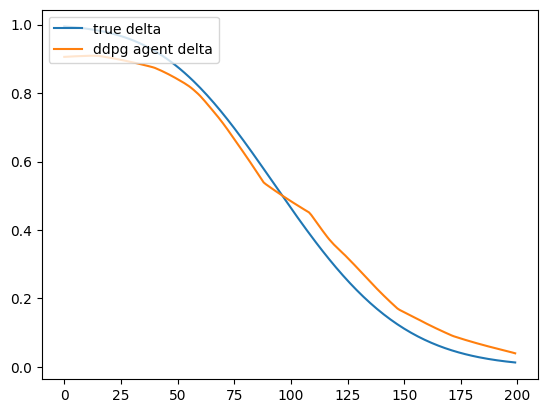

In [5]:
plt.plot(t_delta, label='true delta')
plt.plot(ddpg_agent_delta, label='ddpg agent delta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

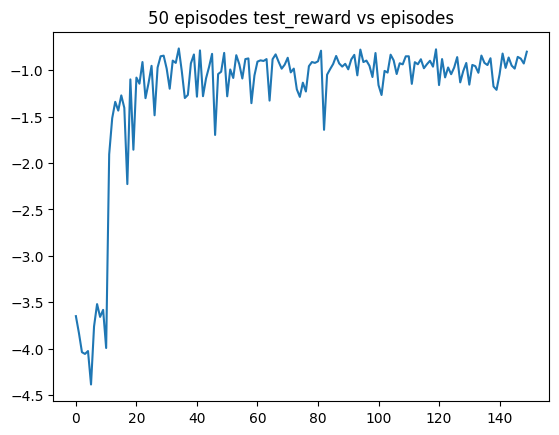

In [6]:
plt.plot(test_scores_ddpg)
plt.title('50 episodes test_reward vs episodes')

In [7]:
from SAC import SACAgent

eposide = 15000
# env = Binomial_stock(S0=50, rf=0, sigma=0.1, n_step=10)
random.seed(24)

sac_agent = SACAgent(tau=0.001)

best_test_50 = -100

test_scores_sac = []
for i in trange(eposide):

    env = GBM_stock(S0=50, rf=0.05, sigma=0.3, n_step=20)
    done = False
    score = 0
    state = env.reset()
    while not done:
        action = sac_agent.choose_action(state)
        next_state, reward, done = env.step(action)
        sac_agent.remember(state, action, reward, next_state, int(done))
        sac_agent.learn()
        score += reward
        state = next_state

    # score_history.append(score)
    if (i+1) % 100 == 0:
        test_50 = episodes_50_gbm(sac_agent, S=50, r=0.05, sigma=0.3, n_step=20)
        print('episode ', i, 'score %.2f' % score,
              '50 test average score %.2f' % test_50)

        if test_50 > best_test_50:
            best_test_50 = test_50
            sac_agent.save_models()

        test_scores_sac.append(test_50)
        if abs(test_50) < 0.1:
            print('Finish training early')
            break

  1%|▏                                    | 100/15000 [00:39<2:19:25,  1.78it/s]

episode  99 score -4.63 50 test average score -4.07
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  1%|▍                                    | 200/15000 [01:26<2:23:55,  1.71it/s]

episode  199 score -2.17 50 test average score -4.11


  2%|▋                                    | 300/15000 [02:14<2:20:29,  1.74it/s]

episode  299 score -7.69 50 test average score -4.72


  3%|▉                                    | 400/15000 [03:01<2:18:35,  1.76it/s]

episode  399 score -3.64 50 test average score -4.49


  3%|█▏                                   | 500/15000 [03:47<2:17:19,  1.76it/s]

episode  499 score -3.49 50 test average score -4.02
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  4%|█▍                                   | 600/15000 [04:35<2:16:28,  1.76it/s]

episode  599 score -5.56 50 test average score -4.15


  5%|█▋                                   | 700/15000 [05:21<2:15:49,  1.75it/s]

episode  699 score -5.13 50 test average score -4.11


  5%|█▉                                   | 800/15000 [06:08<2:14:32,  1.76it/s]

episode  799 score -2.93 50 test average score -4.09


  6%|██▏                                  | 900/15000 [06:55<2:13:28,  1.76it/s]

episode  899 score -2.74 50 test average score -4.41


  7%|██▍                                 | 1000/15000 [07:42<2:13:22,  1.75it/s]

episode  999 score -3.37 50 test average score -4.47


  7%|██▋                                 | 1100/15000 [08:29<2:12:05,  1.75it/s]

episode  1099 score -3.33 50 test average score -3.72
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  8%|██▉                                 | 1200/15000 [09:17<2:16:37,  1.68it/s]

episode  1199 score -4.91 50 test average score -4.46


  9%|███                                 | 1300/15000 [10:05<2:10:41,  1.75it/s]

episode  1299 score -2.42 50 test average score -4.26


  9%|███▎                                | 1400/15000 [10:52<2:08:17,  1.77it/s]

episode  1399 score -6.51 50 test average score -4.39


 10%|███▌                                | 1500/15000 [11:39<2:10:32,  1.72it/s]

episode  1499 score -1.98 50 test average score -4.11


 11%|███▊                                | 1599/15000 [12:26<1:46:11,  2.10it/s]/Users/zhuzheng/opt/anaconda3/envs/torch1/lib/python3.10/site-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
 11%|███▊                                | 1600/15000 [12:27<2:09:46,  1.72it/s]

episode  1599 score -8.95 50 test average score -7.34


 11%|████                                | 1700/15000 [13:14<2:12:14,  1.68it/s]

episode  1699 score -11.03 50 test average score -4.06


 12%|████▎                               | 1800/15000 [14:01<2:16:59,  1.61it/s]

episode  1799 score -7.59 50 test average score -4.51


 13%|████▌                               | 1900/15000 [14:48<2:06:13,  1.73it/s]

episode  1899 score -6.83 50 test average score -4.26


 13%|████▊                               | 2000/15000 [15:35<2:04:23,  1.74it/s]

episode  1999 score -8.66 50 test average score -4.35


 14%|█████                               | 2100/15000 [16:23<2:03:28,  1.74it/s]

episode  2099 score -7.12 50 test average score -4.67


 15%|█████▎                              | 2200/15000 [17:10<2:01:54,  1.75it/s]

episode  2199 score -9.09 50 test average score -3.74


 15%|█████▌                              | 2300/15000 [17:57<2:03:26,  1.71it/s]

episode  2299 score -10.20 50 test average score -4.22


 16%|█████▊                              | 2400/15000 [18:45<2:01:19,  1.73it/s]

episode  2399 score -8.04 50 test average score -4.34


 17%|██████                              | 2500/15000 [19:33<2:14:48,  1.55it/s]

episode  2499 score -8.15 50 test average score -4.32


 17%|██████▏                             | 2600/15000 [20:21<1:57:17,  1.76it/s]

episode  2599 score -7.10 50 test average score -4.96


 18%|██████▍                             | 2700/15000 [21:09<1:56:55,  1.75it/s]

episode  2699 score -6.88 50 test average score -4.26


 19%|██████▋                             | 2800/15000 [21:56<1:57:15,  1.73it/s]

episode  2799 score -5.91 50 test average score -4.41


 19%|██████▉                             | 2900/15000 [22:43<1:54:08,  1.77it/s]

episode  2899 score -12.21 50 test average score -4.24


 20%|███████▏                            | 3000/15000 [23:30<1:55:14,  1.74it/s]

episode  2999 score -13.02 50 test average score -4.47


 21%|███████▍                            | 3100/15000 [24:17<1:54:59,  1.72it/s]

episode  3099 score -4.20 50 test average score -3.81


 21%|███████▋                            | 3200/15000 [25:05<1:52:37,  1.75it/s]

episode  3199 score -8.24 50 test average score -4.42


 22%|███████▉                            | 3300/15000 [25:52<1:51:39,  1.75it/s]

episode  3299 score -5.50 50 test average score -4.14


 23%|████████▏                           | 3400/15000 [26:39<1:50:36,  1.75it/s]

episode  3399 score -6.15 50 test average score -4.48


 23%|████████▍                           | 3500/15000 [27:27<1:50:54,  1.73it/s]

episode  3499 score -6.20 50 test average score -4.34


 24%|████████▋                           | 3600/15000 [28:14<1:49:38,  1.73it/s]

episode  3599 score -7.49 50 test average score -3.97


 25%|████████▉                           | 3700/15000 [29:01<1:47:07,  1.76it/s]

episode  3699 score -6.81 50 test average score -4.32


 25%|█████████                           | 3800/15000 [29:48<1:48:05,  1.73it/s]

episode  3799 score -9.46 50 test average score -4.42


 26%|█████████▎                          | 3900/15000 [30:37<1:46:51,  1.73it/s]

episode  3899 score -7.71 50 test average score -3.96


 27%|█████████▌                          | 4000/15000 [31:24<1:46:50,  1.72it/s]

episode  3999 score -6.75 50 test average score -4.16


 27%|█████████▊                          | 4100/15000 [32:11<1:44:53,  1.73it/s]

episode  4099 score -6.31 50 test average score -3.83


 28%|██████████                          | 4200/15000 [32:59<1:46:31,  1.69it/s]

episode  4199 score -6.40 50 test average score -4.45


 29%|██████████▎                         | 4300/15000 [33:46<1:45:00,  1.70it/s]

episode  4299 score -7.79 50 test average score -4.61


 29%|██████████▌                         | 4400/15000 [34:33<1:47:42,  1.64it/s]

episode  4399 score -8.60 50 test average score -4.04


 30%|██████████▊                         | 4500/15000 [35:21<1:45:11,  1.66it/s]

episode  4499 score -4.98 50 test average score -4.37


 31%|███████████                         | 4600/15000 [36:08<1:39:42,  1.74it/s]

episode  4599 score -6.94 50 test average score -3.88


 31%|███████████▎                        | 4700/15000 [36:55<1:39:06,  1.73it/s]

episode  4699 score -7.71 50 test average score -3.97


 32%|███████████▌                        | 4800/15000 [37:42<1:38:45,  1.72it/s]

episode  4799 score -8.35 50 test average score -3.65
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 33%|███████████▊                        | 4900/15000 [38:30<1:38:50,  1.70it/s]

episode  4899 score -7.12 50 test average score -4.51


 33%|████████████                        | 5000/15000 [39:17<1:36:33,  1.73it/s]

episode  4999 score -5.56 50 test average score -3.73


 34%|████████████▏                       | 5100/15000 [40:05<1:34:17,  1.75it/s]

episode  5099 score -5.18 50 test average score -3.90


 35%|████████████▍                       | 5200/15000 [40:54<1:36:15,  1.70it/s]

episode  5199 score -8.75 50 test average score -3.60
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 35%|████████████▋                       | 5300/15000 [41:43<1:32:56,  1.74it/s]

episode  5299 score -5.16 50 test average score -3.05
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 36%|████████████▉                       | 5400/15000 [42:31<1:32:57,  1.72it/s]

episode  5399 score -4.97 50 test average score -2.95
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 37%|█████████████▏                      | 5500/15000 [43:18<1:31:23,  1.73it/s]

episode  5499 score -7.07 50 test average score -3.03


 37%|█████████████▍                      | 5600/15000 [44:06<1:30:06,  1.74it/s]

episode  5599 score -7.68 50 test average score -3.70


 38%|█████████████▋                      | 5700/15000 [44:53<1:28:53,  1.74it/s]

episode  5699 score -5.23 50 test average score -3.45


 39%|█████████████▉                      | 5800/15000 [45:40<1:28:21,  1.74it/s]

episode  5799 score -4.77 50 test average score -3.86


 39%|██████████████▏                     | 5900/15000 [46:28<1:28:23,  1.72it/s]

episode  5899 score -5.67 50 test average score -2.75
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 40%|██████████████▍                     | 6000/15000 [47:15<1:27:06,  1.72it/s]

episode  5999 score -8.96 50 test average score -2.33
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 41%|██████████████▋                     | 6100/15000 [48:03<1:25:51,  1.73it/s]

episode  6099 score -5.41 50 test average score -3.65


 41%|██████████████▉                     | 6200/15000 [48:51<1:24:33,  1.73it/s]

episode  6199 score -6.35 50 test average score -3.51


 42%|███████████████                     | 6300/15000 [49:38<1:23:48,  1.73it/s]

episode  6299 score -8.13 50 test average score -3.23


 43%|███████████████▎                    | 6400/15000 [50:26<1:23:26,  1.72it/s]

episode  6399 score -6.76 50 test average score -2.67


 43%|███████████████▌                    | 6500/15000 [51:14<1:23:04,  1.71it/s]

episode  6499 score -6.62 50 test average score -2.91


 44%|███████████████▊                    | 6600/15000 [52:01<1:21:14,  1.72it/s]

episode  6599 score -5.59 50 test average score -3.22


 45%|████████████████                    | 6700/15000 [52:49<1:21:28,  1.70it/s]

episode  6699 score -5.43 50 test average score -2.51


 45%|████████████████▎                   | 6800/15000 [53:36<1:20:20,  1.70it/s]

episode  6799 score -7.45 50 test average score -3.13


 46%|████████████████▌                   | 6900/15000 [54:24<1:17:15,  1.75it/s]

episode  6899 score -5.86 50 test average score -2.61


 47%|████████████████▊                   | 7000/15000 [55:11<1:16:42,  1.74it/s]

episode  6999 score -8.54 50 test average score -2.68


 47%|█████████████████                   | 7100/15000 [55:58<1:16:11,  1.73it/s]

episode  7099 score -6.61 50 test average score -2.55


 48%|█████████████████▎                  | 7200/15000 [56:46<1:15:21,  1.73it/s]

episode  7199 score -6.65 50 test average score -3.01


 49%|█████████████████▌                  | 7300/15000 [57:33<1:14:53,  1.71it/s]

episode  7299 score -7.39 50 test average score -2.92


 49%|█████████████████▊                  | 7400/15000 [58:21<1:14:26,  1.70it/s]

episode  7399 score -6.69 50 test average score -3.46


 50%|██████████████████                  | 7500/15000 [59:08<1:13:29,  1.70it/s]

episode  7499 score -5.05 50 test average score -3.32


 51%|██████████████████▏                 | 7600/15000 [59:56<1:21:44,  1.51it/s]

episode  7599 score -5.99 50 test average score -2.99


 51%|█████████████████▍                | 7700/15000 [1:00:44<1:11:13,  1.71it/s]

episode  7699 score -5.37 50 test average score -2.22
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 52%|█████████████████▋                | 7800/15000 [1:01:32<1:10:17,  1.71it/s]

episode  7799 score -6.54 50 test average score -3.53


 53%|█████████████████▉                | 7900/15000 [1:02:19<1:10:29,  1.68it/s]

episode  7899 score -6.70 50 test average score -3.09


 53%|██████████████████▏               | 8000/15000 [1:03:07<1:09:08,  1.69it/s]

episode  7999 score -9.32 50 test average score -2.97


 54%|██████████████████▎               | 8100/15000 [1:03:54<1:09:17,  1.66it/s]

episode  8099 score -8.48 50 test average score -2.21
--- saving models ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 55%|██████████████████▌               | 8200/15000 [1:04:42<1:07:59,  1.67it/s]

episode  8199 score -3.89 50 test average score -2.45


 55%|██████████████████▊               | 8300/15000 [1:05:29<1:08:50,  1.62it/s]

episode  8299 score -10.06 50 test average score -2.91


 56%|███████████████████               | 8400/15000 [1:06:17<1:09:41,  1.58it/s]

episode  8399 score -5.79 50 test average score -3.47


 57%|███████████████████▎              | 8500/15000 [1:07:05<1:08:44,  1.58it/s]

episode  8499 score -3.51 50 test average score -2.94


 57%|███████████████████▍              | 8600/15000 [1:07:52<1:02:29,  1.71it/s]

episode  8599 score -5.92 50 test average score -2.77


 58%|███████████████████▋              | 8700/15000 [1:08:40<1:01:17,  1.71it/s]

episode  8699 score -9.42 50 test average score -3.31


 59%|███████████████████▉              | 8800/15000 [1:09:28<1:02:20,  1.66it/s]

episode  8799 score -5.39 50 test average score -2.35


 59%|████████████████████▏             | 8900/15000 [1:10:16<1:01:37,  1.65it/s]

episode  8899 score -6.99 50 test average score -2.96


 60%|█████████████████████▌              | 9000/15000 [1:11:03<57:21,  1.74it/s]

episode  8999 score -10.86 50 test average score -3.44


 61%|█████████████████████▊              | 9100/15000 [1:11:51<57:15,  1.72it/s]

episode  9099 score -6.12 50 test average score -3.60


 61%|██████████████████████              | 9200/15000 [1:12:39<55:50,  1.73it/s]

episode  9199 score -7.99 50 test average score -3.23


 62%|██████████████████████▎             | 9300/15000 [1:13:27<56:17,  1.69it/s]

episode  9299 score -7.68 50 test average score -2.54


 63%|██████████████████████▌             | 9400/15000 [1:14:14<54:42,  1.71it/s]

episode  9399 score -9.21 50 test average score -2.94


 63%|██████████████████████▊             | 9500/15000 [1:15:02<53:59,  1.70it/s]

episode  9499 score -7.39 50 test average score -2.93


 64%|███████████████████████             | 9600/15000 [1:15:50<52:33,  1.71it/s]

episode  9599 score -6.06 50 test average score -2.52


 65%|███████████████████████▎            | 9700/15000 [1:16:37<51:02,  1.73it/s]

episode  9699 score -6.56 50 test average score -3.74


 65%|███████████████████████▌            | 9800/15000 [1:17:25<50:31,  1.72it/s]

episode  9799 score -6.50 50 test average score -3.33


 66%|███████████████████████▊            | 9900/15000 [1:18:14<49:52,  1.70it/s]

episode  9899 score -7.32 50 test average score -2.95


 67%|███████████████████████▎           | 10000/15000 [1:19:02<48:47,  1.71it/s]

episode  9999 score -6.54 50 test average score -2.77


 67%|███████████████████████▌           | 10100/15000 [1:19:50<47:58,  1.70it/s]

episode  10099 score -9.07 50 test average score -2.99


 68%|███████████████████████▊           | 10200/15000 [1:20:38<46:53,  1.71it/s]

episode  10199 score -6.46 50 test average score -2.90


 69%|████████████████████████           | 10300/15000 [1:21:26<45:32,  1.72it/s]

episode  10299 score -5.02 50 test average score -4.11


 69%|████████████████████████▎          | 10400/15000 [1:22:13<44:26,  1.72it/s]

episode  10399 score -6.75 50 test average score -2.97


 70%|████████████████████████▌          | 10500/15000 [1:23:01<43:54,  1.71it/s]

episode  10499 score -5.39 50 test average score -2.98


 71%|████████████████████████▋          | 10600/15000 [1:23:49<42:46,  1.71it/s]

episode  10599 score -8.80 50 test average score -3.36


 71%|████████████████████████▉          | 10700/15000 [1:24:37<41:58,  1.71it/s]

episode  10699 score -8.08 50 test average score -2.87


 72%|█████████████████████████▏         | 10800/15000 [1:25:25<40:51,  1.71it/s]

episode  10799 score -10.48 50 test average score -3.05


 73%|█████████████████████████▍         | 10900/15000 [1:26:13<40:56,  1.67it/s]

episode  10899 score -6.16 50 test average score -2.97


 73%|█████████████████████████▋         | 11000/15000 [1:27:01<39:22,  1.69it/s]

episode  10999 score -4.95 50 test average score -2.45


 74%|█████████████████████████▉         | 11100/15000 [1:27:48<37:42,  1.72it/s]

episode  11099 score -5.78 50 test average score -2.61


 75%|██████████████████████████▏        | 11200/15000 [1:28:37<37:20,  1.70it/s]

episode  11199 score -5.98 50 test average score -2.87


 75%|██████████████████████████▎        | 11300/15000 [1:29:25<35:46,  1.72it/s]

episode  11299 score -7.03 50 test average score -3.15


 76%|██████████████████████████▌        | 11400/15000 [1:30:13<34:36,  1.73it/s]

episode  11399 score -7.34 50 test average score -2.61


 77%|██████████████████████████▊        | 11500/15000 [1:31:00<34:13,  1.70it/s]

episode  11499 score -5.58 50 test average score -3.60


 77%|███████████████████████████        | 11600/15000 [1:31:48<32:42,  1.73it/s]

episode  11599 score -7.21 50 test average score -2.78


 78%|███████████████████████████▎       | 11700/15000 [1:32:35<31:50,  1.73it/s]

episode  11699 score -4.68 50 test average score -2.59


 79%|███████████████████████████▌       | 11800/15000 [1:33:22<31:09,  1.71it/s]

episode  11799 score -6.82 50 test average score -2.82


 79%|███████████████████████████▊       | 11900/15000 [1:34:10<29:57,  1.72it/s]

episode  11899 score -6.16 50 test average score -3.83


 80%|████████████████████████████       | 12000/15000 [1:34:58<29:51,  1.67it/s]

episode  11999 score -8.30 50 test average score -3.07


 81%|████████████████████████████▏      | 12100/15000 [1:35:45<28:12,  1.71it/s]

episode  12099 score -7.76 50 test average score -3.22


 81%|████████████████████████████▍      | 12200/15000 [1:36:33<26:53,  1.73it/s]

episode  12199 score -6.71 50 test average score -2.91


 82%|████████████████████████████▋      | 12300/15000 [1:37:20<26:16,  1.71it/s]

episode  12299 score -6.95 50 test average score -2.94


 83%|████████████████████████████▉      | 12400/15000 [1:38:08<25:12,  1.72it/s]

episode  12399 score -6.02 50 test average score -2.89


 83%|█████████████████████████████▏     | 12500/15000 [1:38:55<24:20,  1.71it/s]

episode  12499 score -6.14 50 test average score -2.85


 84%|█████████████████████████████▍     | 12600/15000 [1:39:43<23:13,  1.72it/s]

episode  12599 score -6.67 50 test average score -3.07


 85%|█████████████████████████████▋     | 12700/15000 [1:40:31<22:04,  1.74it/s]

episode  12699 score -5.42 50 test average score -2.47


 85%|█████████████████████████████▊     | 12800/15000 [1:41:18<21:30,  1.71it/s]

episode  12799 score -9.63 50 test average score -3.26


 86%|██████████████████████████████     | 12900/15000 [1:42:07<20:13,  1.73it/s]

episode  12899 score -5.98 50 test average score -2.80


 87%|██████████████████████████████▎    | 13000/15000 [1:42:54<19:26,  1.71it/s]

episode  12999 score -10.63 50 test average score -3.15


 87%|██████████████████████████████▌    | 13100/15000 [1:43:42<18:24,  1.72it/s]

episode  13099 score -7.60 50 test average score -2.48


 88%|██████████████████████████████▊    | 13200/15000 [1:44:30<17:38,  1.70it/s]

episode  13199 score -9.91 50 test average score -2.75


 89%|███████████████████████████████    | 13300/15000 [1:45:17<16:36,  1.71it/s]

episode  13299 score -6.93 50 test average score -2.68


 89%|███████████████████████████████▎   | 13400/15000 [1:46:05<15:31,  1.72it/s]

episode  13399 score -5.95 50 test average score -3.02


 90%|███████████████████████████████▌   | 13500/15000 [1:46:53<14:46,  1.69it/s]

episode  13499 score -7.90 50 test average score -2.92


 91%|███████████████████████████████▋   | 13600/15000 [1:47:40<13:40,  1.71it/s]

episode  13599 score -8.43 50 test average score -2.40


 91%|███████████████████████████████▉   | 13700/15000 [1:48:28<12:50,  1.69it/s]

episode  13699 score -4.19 50 test average score -3.42


 92%|████████████████████████████████▏  | 13800/15000 [1:49:15<11:53,  1.68it/s]

episode  13799 score -8.08 50 test average score -2.70


 93%|████████████████████████████████▍  | 13900/15000 [1:50:03<10:56,  1.68it/s]

episode  13899 score -7.40 50 test average score -2.79


 93%|████████████████████████████████▋  | 14000/15000 [1:50:51<09:56,  1.68it/s]

episode  13999 score -7.57 50 test average score -3.00


 94%|████████████████████████████████▉  | 14100/15000 [1:51:39<08:59,  1.67it/s]

episode  14099 score -6.55 50 test average score -2.63


 95%|█████████████████████████████████▏ | 14200/15000 [1:52:26<07:57,  1.68it/s]

episode  14199 score -7.96 50 test average score -2.78


 95%|█████████████████████████████████▎ | 14300/15000 [1:53:14<07:02,  1.66it/s]

episode  14299 score -8.91 50 test average score -2.95


 96%|█████████████████████████████████▌ | 14400/15000 [1:54:01<06:14,  1.60it/s]

episode  14399 score -5.83 50 test average score -2.61


 97%|█████████████████████████████████▊ | 14500/15000 [1:54:49<05:04,  1.64it/s]

episode  14499 score -6.88 50 test average score -2.99


 97%|██████████████████████████████████ | 14600/15000 [1:55:36<03:54,  1.71it/s]

episode  14599 score -5.92 50 test average score -2.93


 98%|██████████████████████████████████▎| 14700/15000 [1:56:24<02:53,  1.73it/s]

episode  14699 score -7.04 50 test average score -2.77


 99%|██████████████████████████████████▌| 14800/15000 [1:57:12<01:56,  1.72it/s]

episode  14799 score -9.59 50 test average score -2.59


 99%|██████████████████████████████████▊| 14900/15000 [1:57:59<00:58,  1.71it/s]

episode  14899 score -4.48 50 test average score -2.70


100%|███████████████████████████████████| 15000/15000 [1:58:47<00:00,  2.10it/s]

episode  14999 score -5.38 50 test average score -2.55


In [8]:
import pickle
torch.save(sac_agent, r'./final_sac_agent_gbm.pth')
open_file = open('./test_scores_sac_gbm.pkl', "wb")
pickle.dump(test_scores_sac, open_file)
open_file.close()

In [9]:
sac_agent.load_models()
T = 20 / 252
t_delta = []
sac_agent_delta = []
for i in range(400, 600):
    St = i/10
    env = GBM_stock(S0=St, rf=0.05, sigma=0.3, n_step=20)
    t_delta.append(np.abs(env.put_delta(S=St, K=50, r=0.05, sigma=0.3, tau=T)))
    observation = [St, T]
    sac_agent_delta.append(sac_agent.final_action(observation))

--- loading models ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---


/Users/zhuzheng/opt/anaconda3/envs/torch1/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


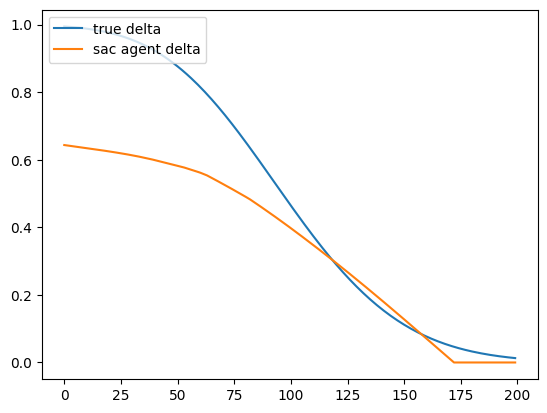

In [10]:
plt.plot(t_delta, label='true delta')
plt.plot(sac_agent_delta, label='sac agent delta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

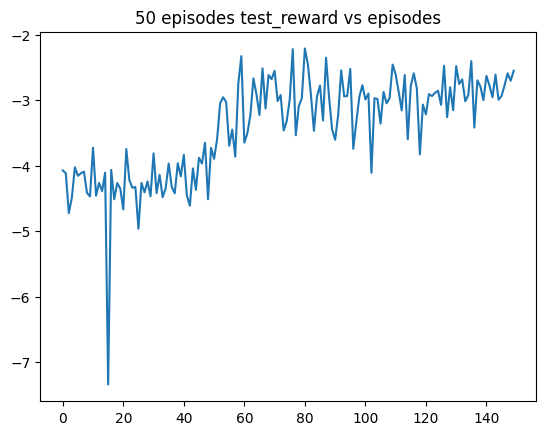

In [11]:
plt.plot(test_scores_sac)
plt.title('50 episodes test_reward vs episodes')

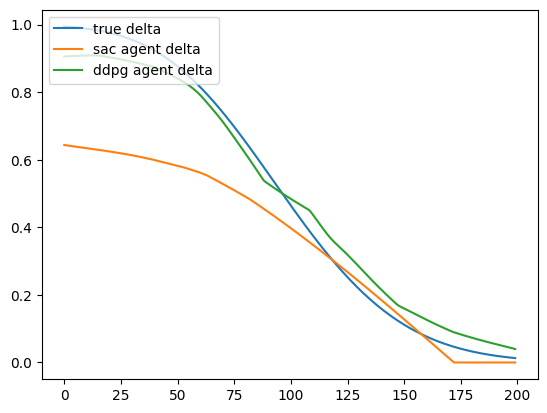

In [12]:
plt.plot(t_delta, label='true delta')
plt.plot(sac_agent_delta, label='sac agent delta')
plt.plot(ddpg_agent_delta, label='ddpg agent delta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

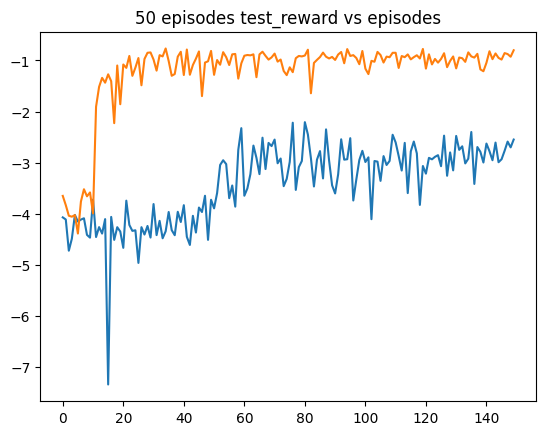

In [13]:
plt.plot(test_scores_sac)
plt.plot(test_scores_ddpg)
plt.title('50 episodes test_reward vs episodes')